**Data Set: Boston House Prices**

The problem that we are going to solve here is that given a set of features that describe a house in Boston, our machine learning model must predict the house price. To train our machine learning model with boston housing data, we will be using scikit-learn’s boston data.

# Importing libraries & loading the Dataset

In [1]:
# Import Essential Libraries
import pandas as pd  # 
import numpy as np

# to visualize data using 2D plots.
import matplotlib.pyplot as plt
# to make 2D plots advanced visualization.
import seaborn as sns
import random

# Seaborn Style
sns.set(style = 'whitegrid')

# For Preprocessing
from sklearn.preprocessing import StandardScaler, MinMaxScaler

#  Preformance metrics
from sklearn.metrics import mean_squared_error, r2_score


In [31]:
#To create machine learning models easily and make predictions.
data = pd.read_csv("boston_housing_prices.csv")

In [32]:
## Remove the whit space
data.columns = data.columns.str.replace(' ', '')

In [18]:
data.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'prices'],
      dtype='object')

In [12]:
data.shape

(506, 14)

In [13]:
data.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   CRIM         506 non-null    float64
 1   ZN           506 non-null    float64
 2   INDUS        506 non-null    float64
 3   CHAS         506 non-null    int64  
 4   NOX          506 non-null    float64
 5   RM           506 non-null    float64
 6   AGE          506 non-null    float64
 7   DIS          506 non-null    float64
 8   RAD          506 non-null    int64  
 9   TAX          506 non-null    int64  
 10  PTRATIO      506 non-null    float64
 11  B            506 non-null    float64
 12  LSTAT        506 non-null    float64
 13  prices       506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


In [14]:
data.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,prices
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


# Exploratory Data Analysis

Exploratory  Data Analysis is a very important step before training the model. Here,  we will use visualizations to understand the relationship of the target  variable with other features.

Let’s first plot the distribution of the target variable. We will use the histogram plot function from the matplotlib library.

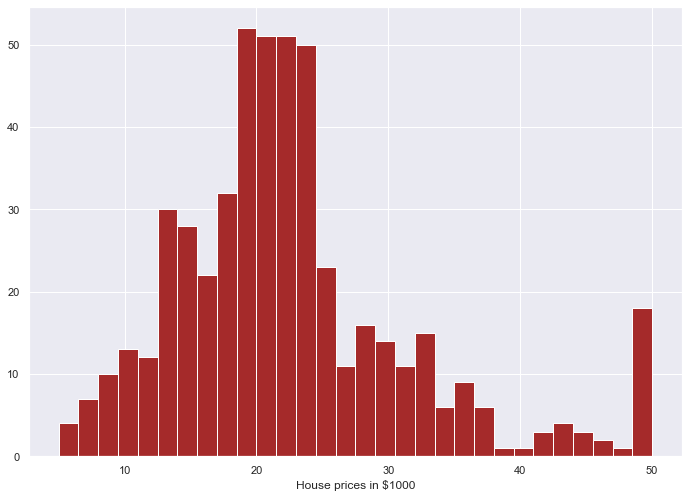

In [33]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
plt.hist(data['prices'],color ="brown", bins=30)
plt.xlabel("House prices in $1000")
plt.show()

We can see from the plot that the values of PRICE are distributed normally with few outliers. Most of the house are around 20–24 range (in $1000 scale)

C:\Users\venki\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


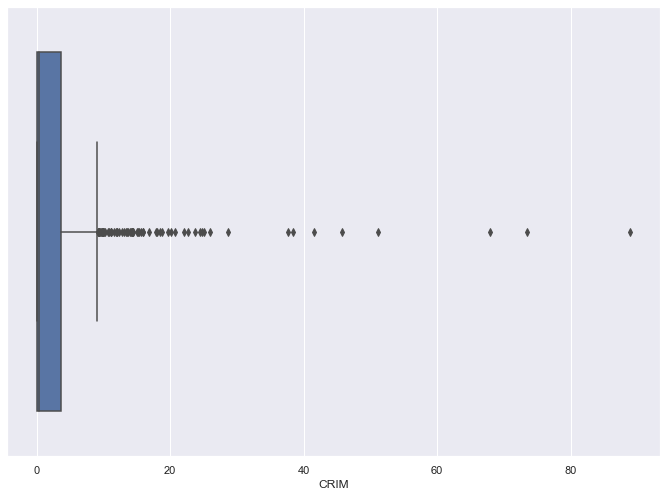

C:\Users\venki\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


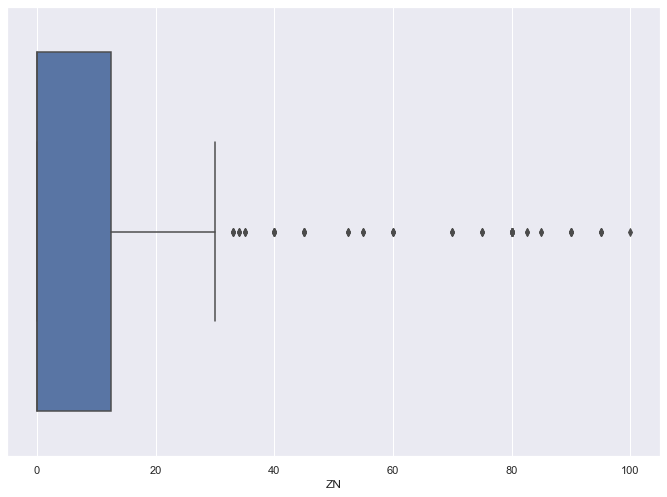

C:\Users\venki\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


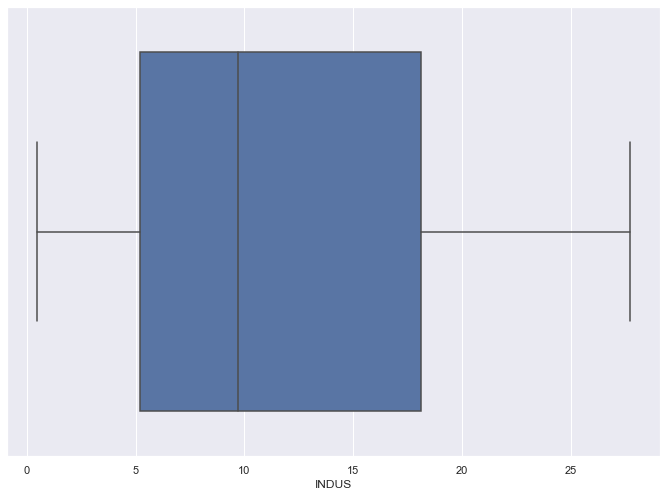

C:\Users\venki\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


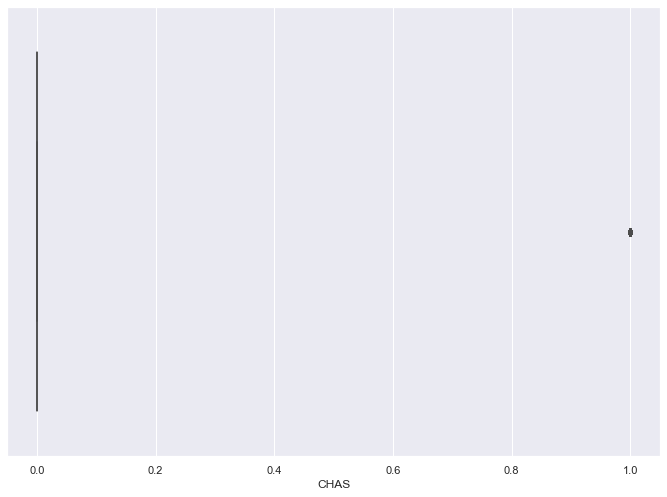

C:\Users\venki\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


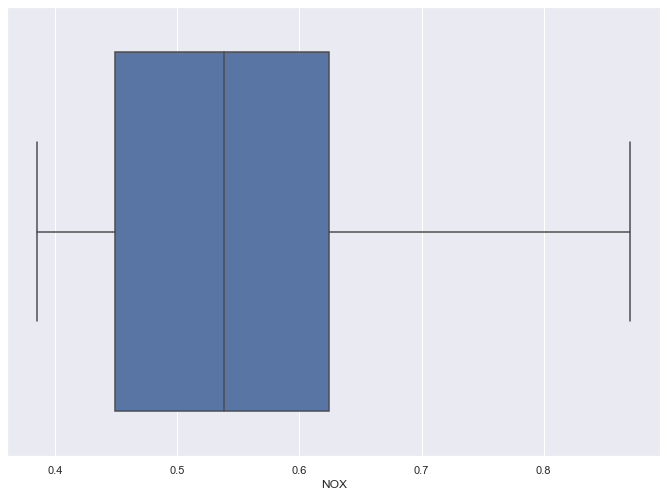

C:\Users\venki\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


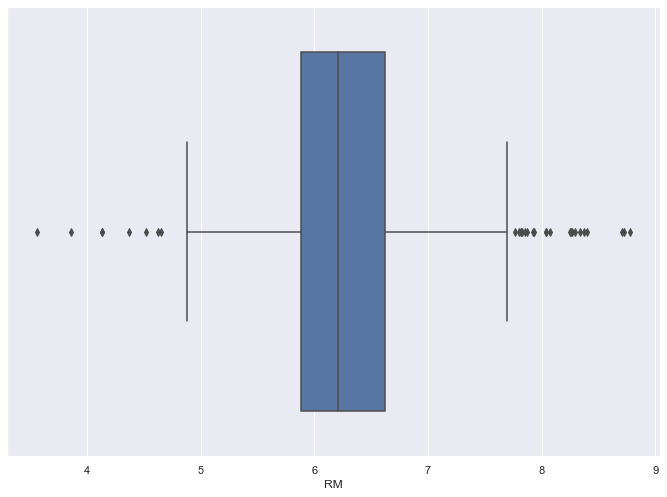

C:\Users\venki\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


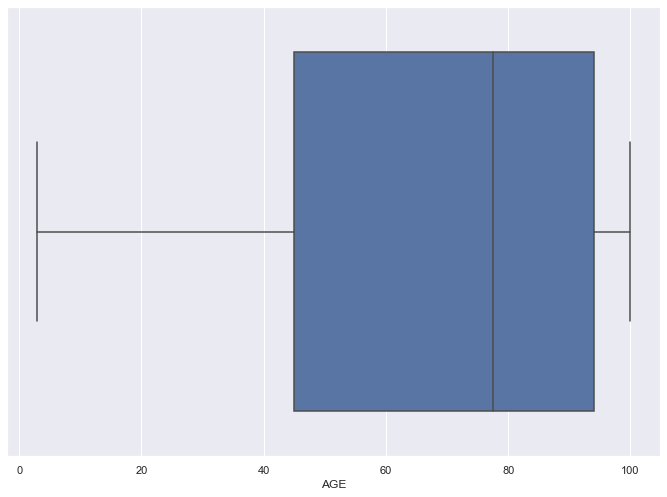

C:\Users\venki\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


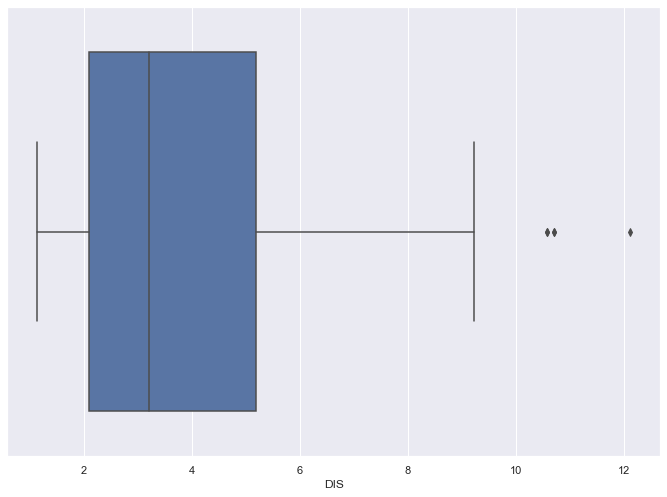

C:\Users\venki\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


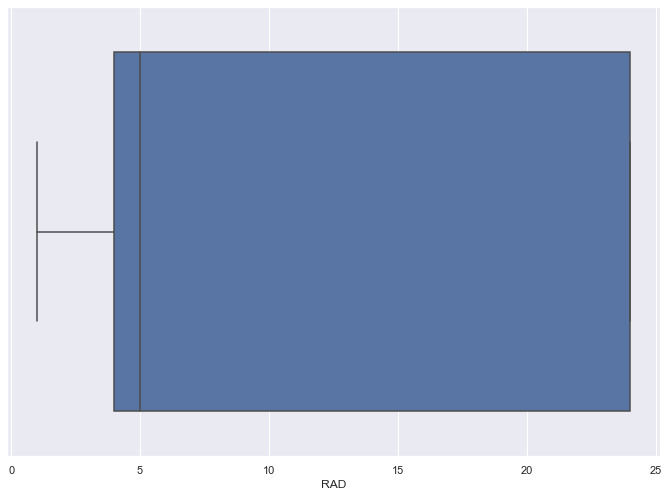

C:\Users\venki\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


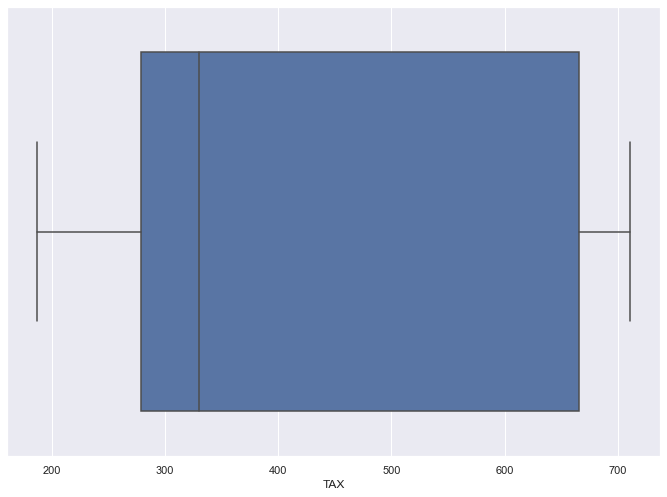

C:\Users\venki\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


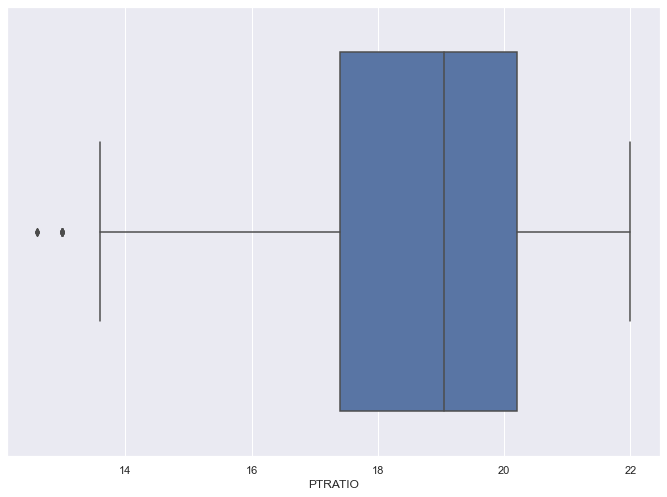

C:\Users\venki\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


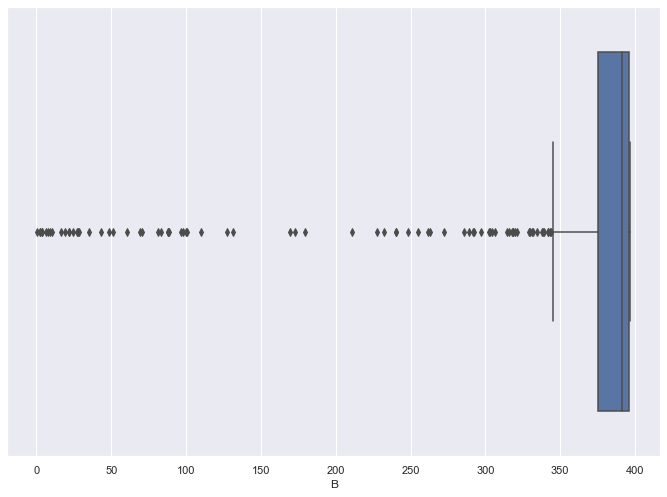

C:\Users\venki\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


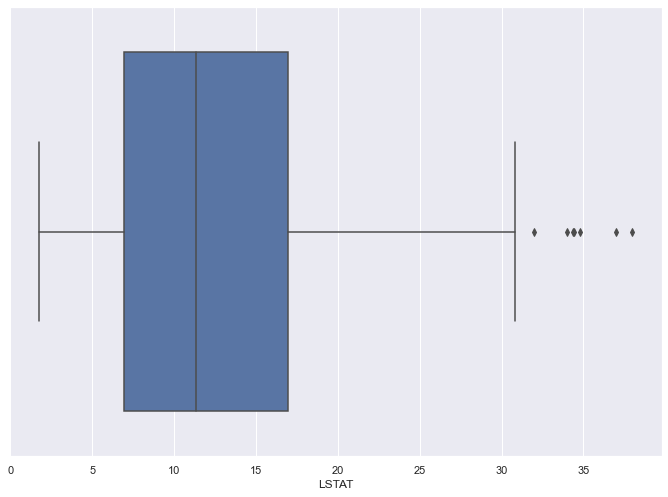

C:\Users\venki\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


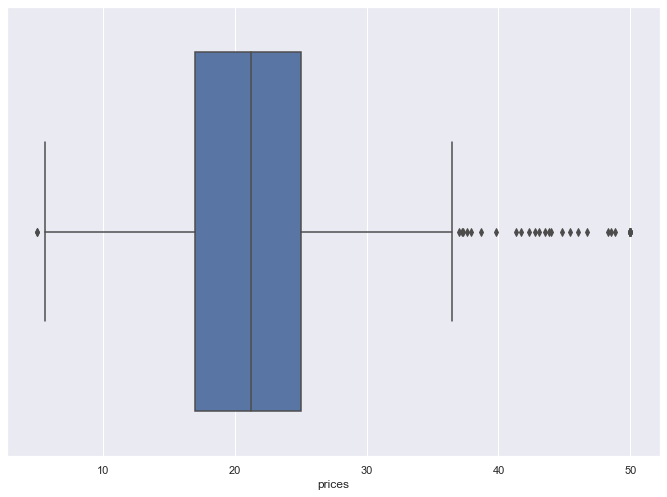

In [34]:
# Checking outliers
cols = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'prices']
for i in cols:
    sns.boxplot(data[i]); plt.show() 

In [41]:
# Outlier tretment
from feature_engine.outliers import Winsorizer
winsor = Winsorizer(capping_method ='iqr', # choose IQR rule boundaries or gaussian for mean and std
                   tail = 'both', # cap left, right or both tails
                   fold = 1.5,
                  # variables = ['']
                  )

for i in cols:
    data[i] = winsor.fit_transform(data[[i]])


C:\Users\venki\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


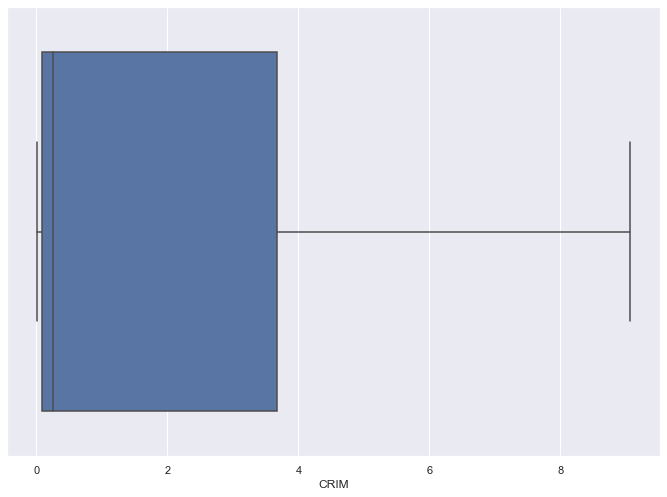

C:\Users\venki\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


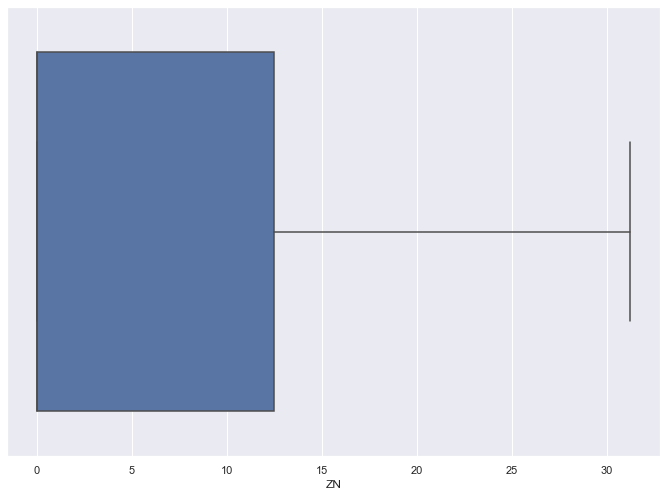

C:\Users\venki\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


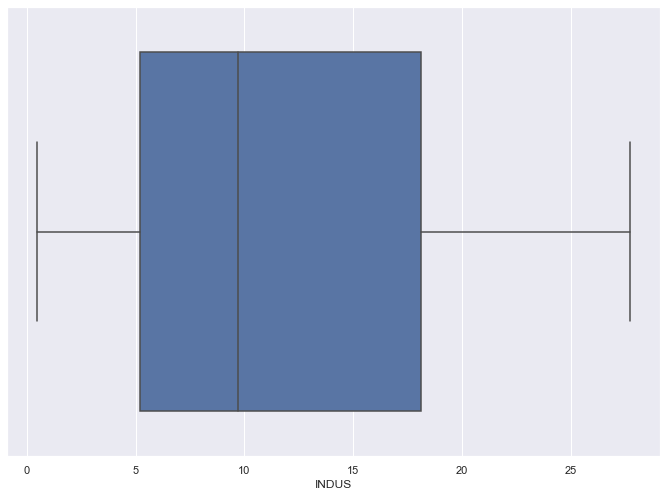

C:\Users\venki\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


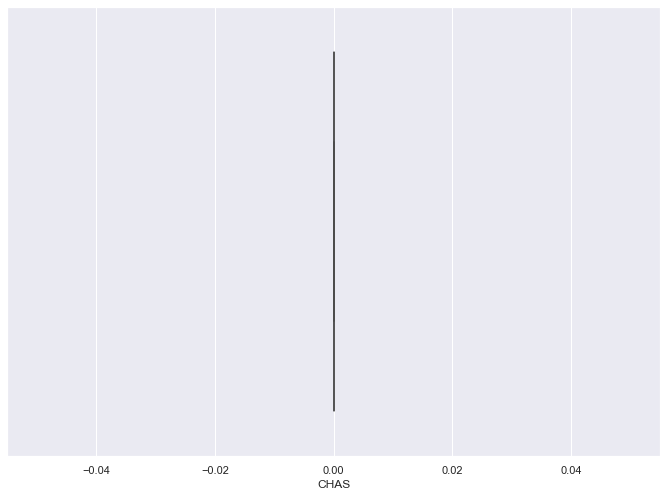

C:\Users\venki\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


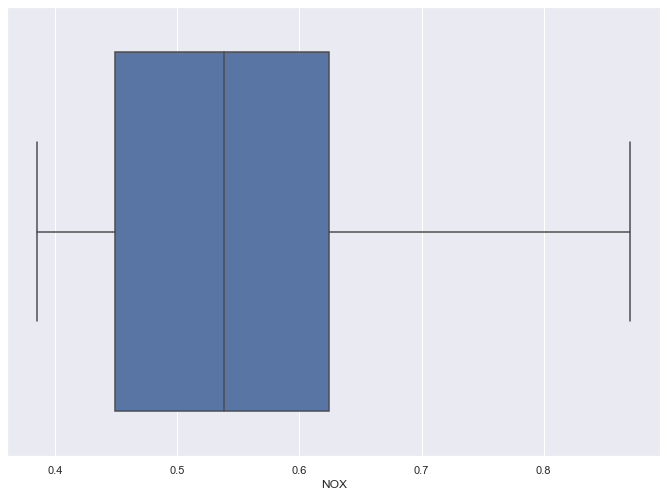

C:\Users\venki\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


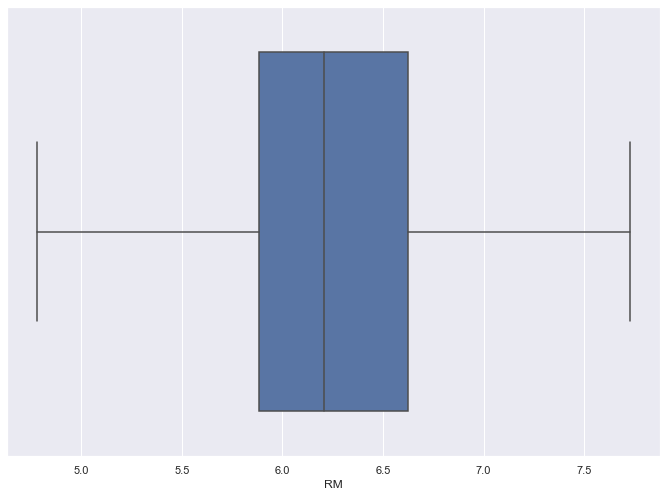

C:\Users\venki\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


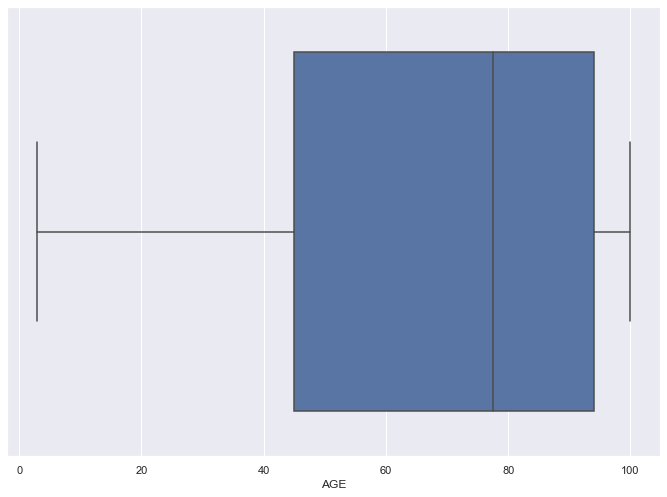

C:\Users\venki\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


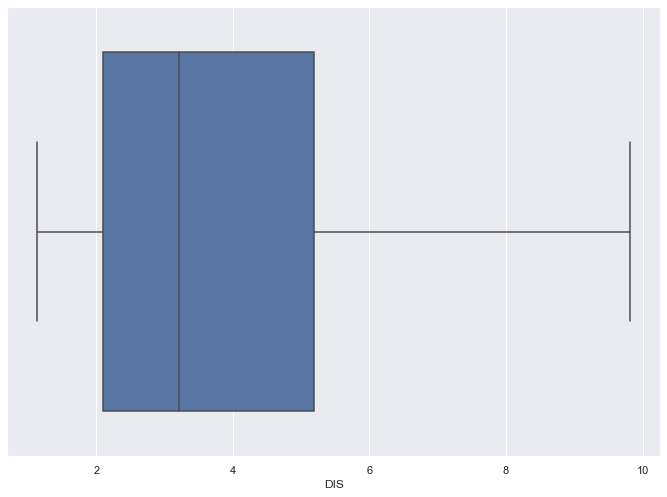

C:\Users\venki\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


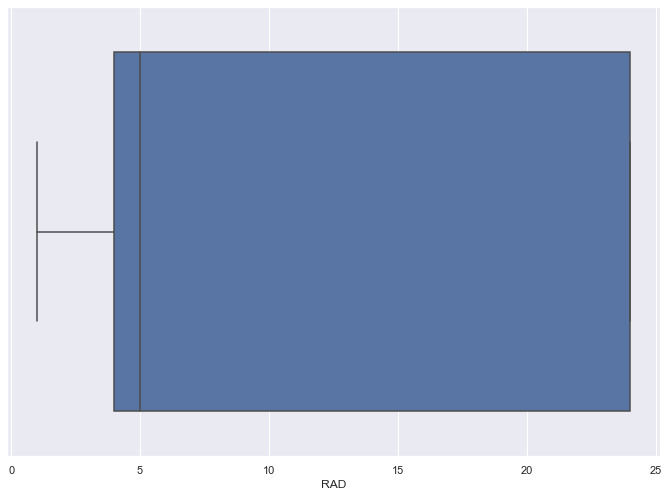

C:\Users\venki\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


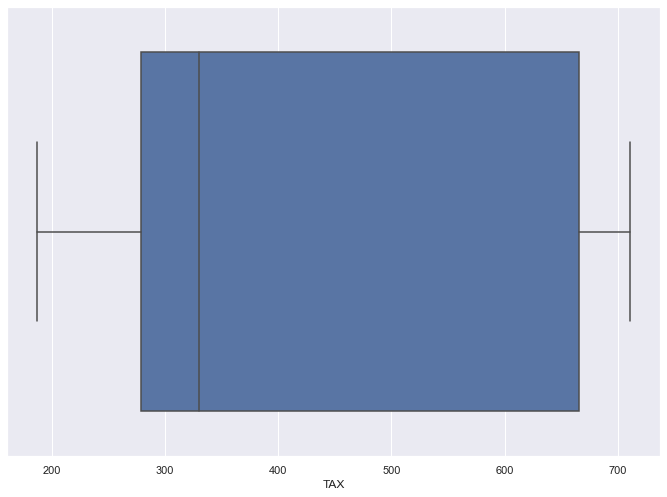

C:\Users\venki\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


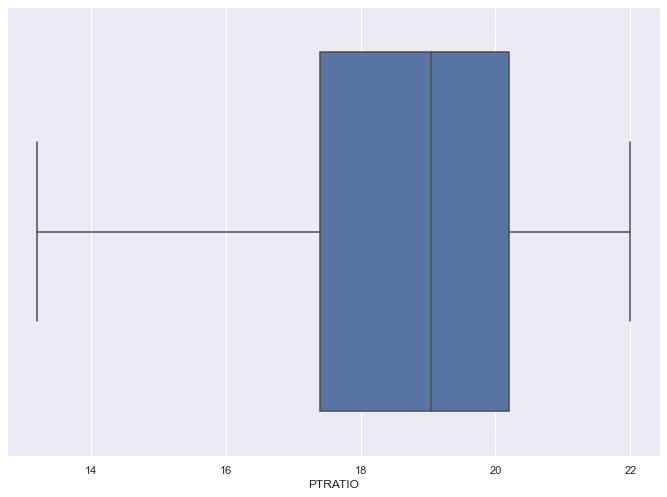

C:\Users\venki\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


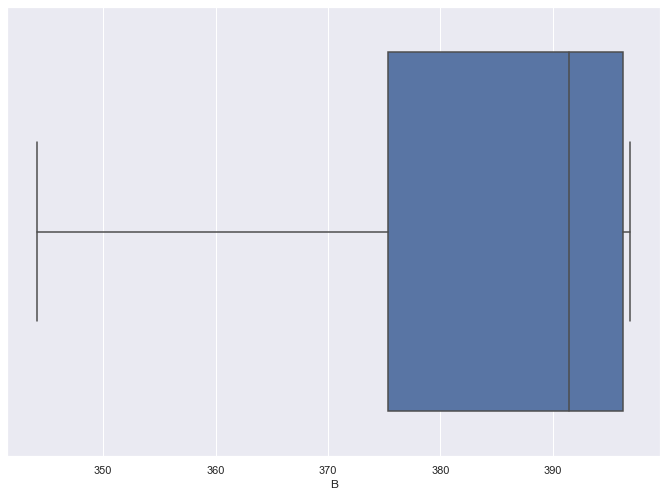

C:\Users\venki\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


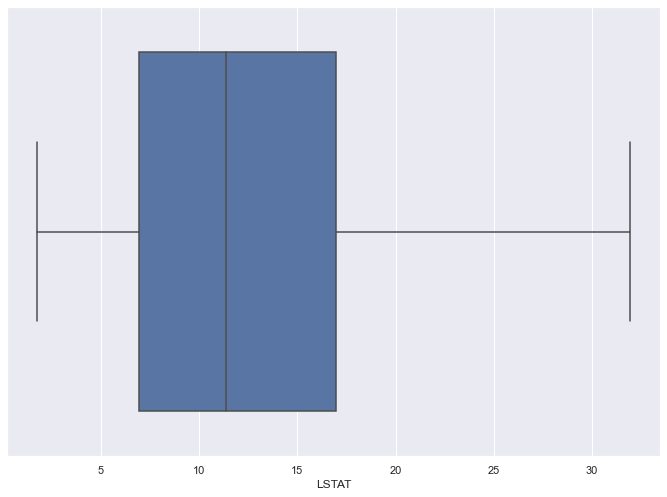

C:\Users\venki\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


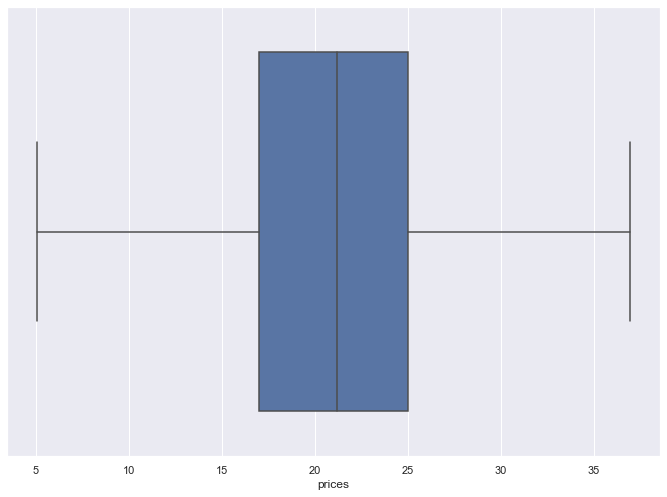

In [42]:
for i in cols:
    sns.boxplot(data[i]); plt.show()  ## no outliers

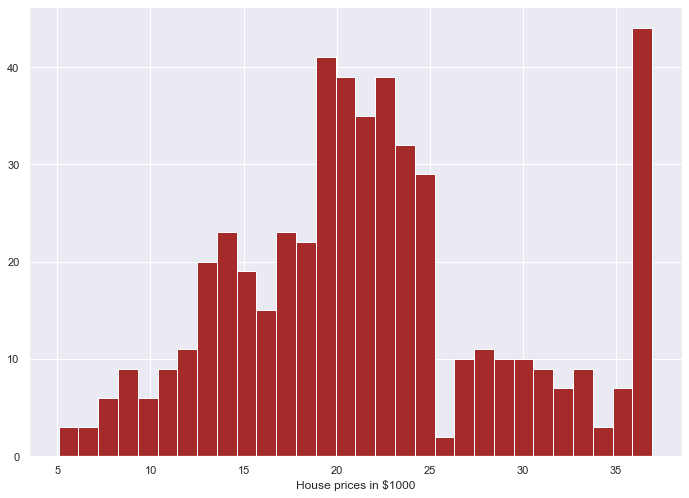

In [50]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
plt.hist(data['prices'],color ="brown", bins=30)
plt.xlabel("House prices in $1000")
plt.show()

## Understanding the Data and statistical analysis

In [43]:
# Identifying the unique number of values in the dataset
data.nunique()

CRIM       440
ZN          11
INDUS       76
CHAS         1
NOX         81
RM         420
AGE        356
DIS        410
RAD          9
TAX         66
PTRATIO     45
B          282
LSTAT      449
prices     207
dtype: int64

## Check for missing values

In [44]:
data.isnull().sum()  

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
prices     0
dtype: int64

In [45]:
print(data.isna().sum())

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
prices     0
dtype: int64


No null and NaN values

# Data Visualization

## Checking the distribution of the data

In [48]:
def draw_plots(data, var, rows, cols):
    fig=plt.figure(figsize=(20,20))
    for i, f in enumerate(var):
        ax=fig.add_subplot(rows,cols,i+1)
        data[f].hist(bins=20,ax=ax, facecolor='midnightblue')
        ax.set_title(f+'Distribution',color='DarkRed')
 
    fig.tight_layout() 

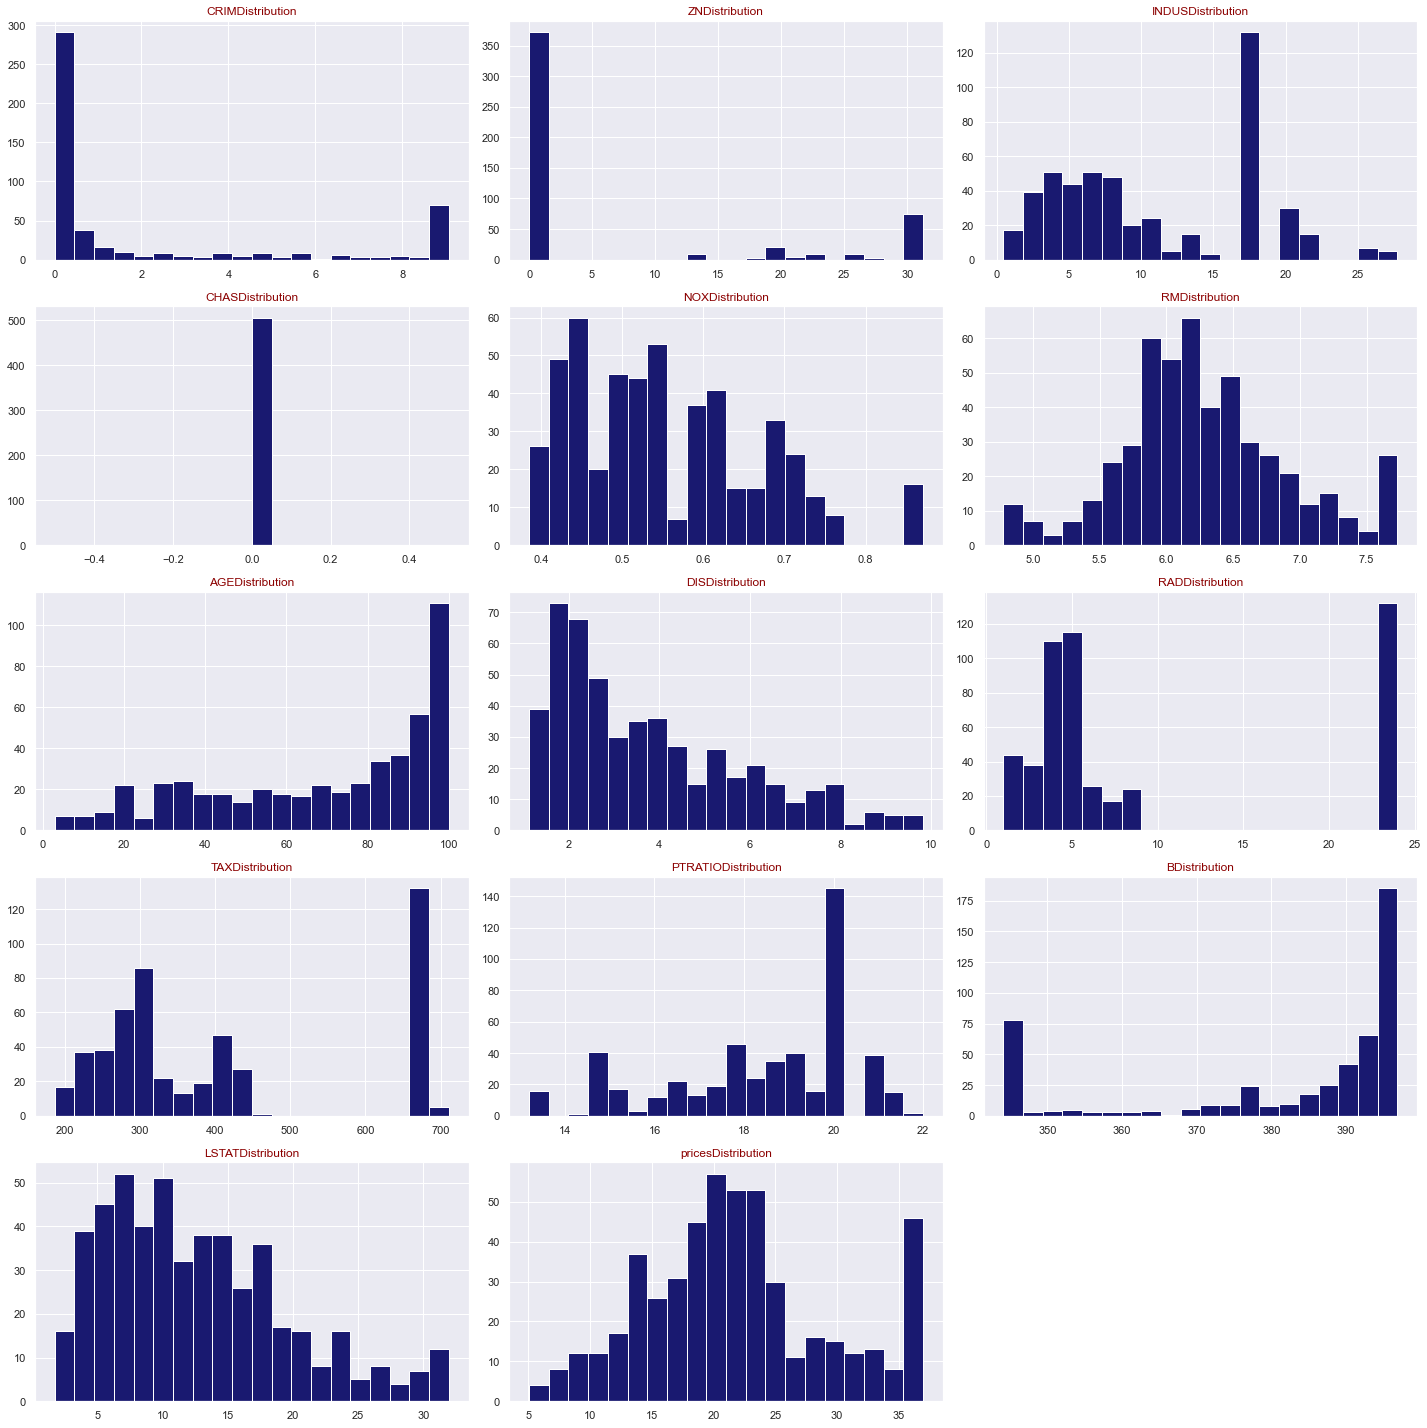

In [49]:
plt.show()
draw_plots(data,data.columns,5,3)

## Explorning data to know relation before processing

<b> The correlation coefficient ranges from -1 to 1. If the value is close  to 1, it means that there is a strong positive correlation between the  two variables. When it is close to -1, the variables have a strong  negative correlation.

In [51]:
# Finding out the correlation between the features
corr = data.corr()
corr

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,prices
CRIM,1.000000,-0.370213,0.629315,NaN,0.663412,-0.260057,0.518951,-0.555054,0.926977,0.870686,0.416269,-0.436156,0.592587,-0.538589
ZN,-0.370213,1.000000,-0.584079,NaN,-0.549670,0.357439,-0.583149,0.681019,-0.344043,-0.383860,-0.432409,0.236768,-0.448131,0.428126
INDUS,0.629315,-0.584079,1.000000,NaN,0.763651,-0.408704,0.644779,-0.713079,0.595129,0.720760,0.382359,-0.417485,0.608158,-0.561174
CHAS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
NOX,0.663412,-0.549670,0.763651,NaN,1.000000,-0.322413,0.731470,-0.775934,0.611441,0.668023,0.190159,-0.427034,0.595619,-0.506505
RM,-0.260057,0.357439,-0.408704,NaN,-0.322413,1.000000,-0.258788,0.224486,-0.206041,-0.292737,-0.353695,0.196260,-0.634425,0.697645
AGE,0.518951,-0.583149,0.644779,NaN,0.731470,-0.258788,1.000000,-0.753333,0.456022,0.506456,0.263355,-0.307560,0.606711,-0.458662
DIS,-0.555054,0.681019,-0.713079,NaN,-0.775934,0.224486,-0.753333,1.000000,-0.500007,-0.540200,-0.238556,0.311406,-0.502644,0.333079
RAD,0.926977,-0.344043,0.595129,NaN,0.611441,-0.206041,0.456022,-0.500007,1.000000,0.910228,0.466698,-0.392793,0.489186,-0.452679
TAX,0.870686,-0.383860,0.720760,NaN,0.668023,-0.292737,0.506456,-0.540200,0.910228,1.000000,0.462693,-0.433288,0.545598,-0.543545


<AxesSubplot:>

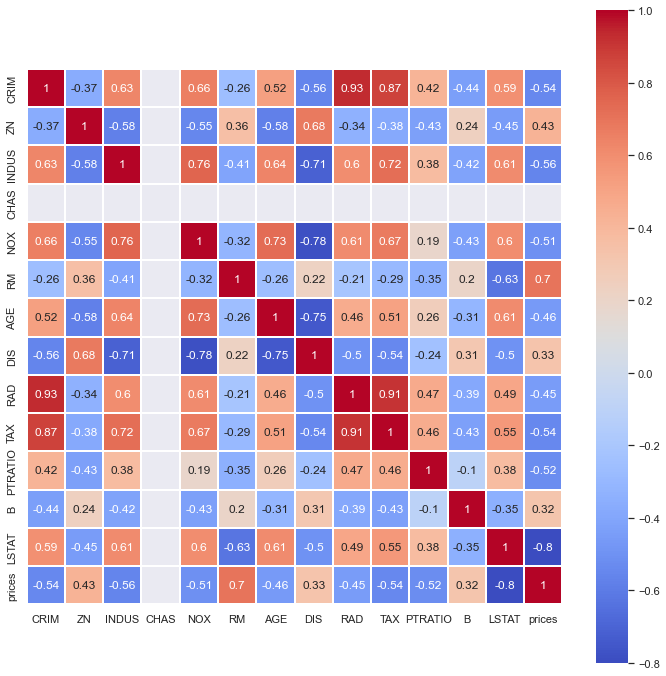

In [52]:
# Plotting the heatmap of correlation between features

plt.figure(figsize=(12,12))
sns.heatmap(data=data.corr().round(2),annot=True,cmap='coolwarm',linewidths=0.2,square=True)

The Big colorful picture above which is called Heatmap helps us to understand how features are correlated to each other.

Postive sign implies postive correlation between two features whereas Negative sign implies negative correlation between two features.  
I am here interested to know which features have good correlation with our dependent variable prices and can help in having good predictions.  
I observed that INDUS, RM, TAX, PTRATIO and LSTAT shows some good correaltion with prices and I am interested to know more about them.  
However I noticed that INDUS shows good correlation with TAX and LSAT which is a pain point for us :(

because it leads to Multicollinearity. So I decided NOT to consider this feature and do further analysis with other 6 remaining features.  

By looking at the correlation matrix we can see that RM has a strong positive correlation with PRICE (0.7) where as LSTAThas a high negative correlation with PRICE (-0.7).

<AxesSubplot:>

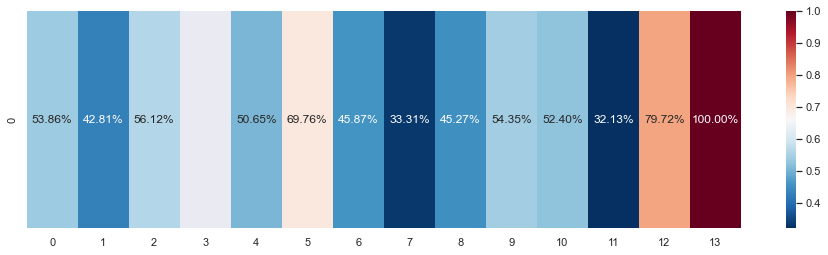

In [53]:
# TODO : Visualizing correlation of features with prediction column `MEDV`

corr_with_prices = data.corrwith(data['prices'])

plt.figure(figsize = (16, 4))
sns.heatmap([np.abs(corr_with_prices)], cmap = 'RdBu_r', annot = True, fmt = '.2%')

In [54]:
# Let's confirm this by using ExtraTreesRegressor
# TODO : To know the feature Importances
y = data['prices'].values
from sklearn.ensemble import ExtraTreesRegressor
etc = ExtraTreesRegressor()
etc.fit(data.iloc[:, :-1].values, y)

print("Percentage Importance of each features with respect to House Price : ")
important_features = pd.Series(etc.feature_importances_*100, index = data.columns[:-1])
important_features

Percentage Importance of each features with respect to House Price : 


CRIM        7.556636
ZN          0.458254
INDUS       2.872581
CHAS        0.000000
NOX         3.394017
RM         26.100211
AGE         2.185241
DIS         2.902257
RAD         1.285107
TAX         3.975873
PTRATIO     6.430340
B           1.742913
LSTAT      41.096570
dtype: float64

In [21]:
# Feature Impotances by ExtraTressRegressor
important_features.sort_values(ascending = False)

LSTAT      37.563901
RM         31.806930
PTRATIO     5.579216
TAX         4.478320
NOX         3.785913
INDUS       3.609023
DIS         2.931659
CRIM        2.827937
AGE         2.097605
B           1.779786
RAD         1.612972
CHAS        1.587970
ZN          0.338769
dtype: float64

In [55]:
# Feature Impotances by Correlation Matrix
corr_with_prices[:-1].abs().sort_values(ascending = False)

LSTAT      0.797200
RM         0.697645
INDUS      0.561174
TAX        0.543545
CRIM       0.538589
PTRATIO    0.523993
NOX        0.506505
AGE        0.458662
RAD        0.452679
ZN         0.428126
DIS        0.333079
B          0.321250
CHAS            NaN
dtype: float64

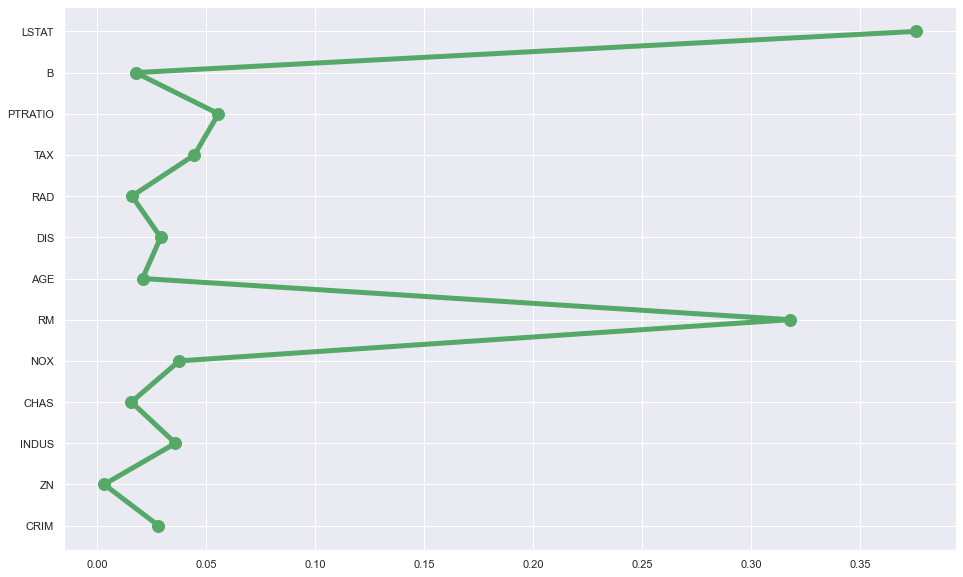

In [23]:
# it says the same proximity
plt.figure(figsize=(16, 10))
plt.plot(etc.feature_importances_, df.columns[:-1], 'go-', linewidth=5, markersize=12)

**From the above feature observations, we found that some columns are most important such as LSTAT and RM**

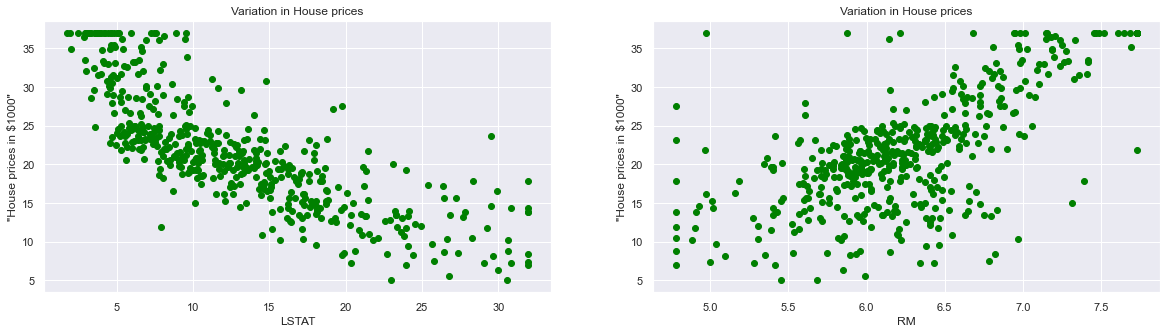

In [56]:
plt.figure(figsize=(20, 5))

features = ['LSTAT', 'RM']
target = data['prices']

for i, col in enumerate(features):
    plt.subplot(1, len(features) , i+1)
    x = data[col]
    y = target
    plt.scatter(x, y,color='green', marker='o')
    plt.title("Variation in House prices")
    plt.xlabel(col)
    plt.ylabel('"House prices in $1000"')

The prices increase as the value of RM increases linearly. There are few outliers and the data seems to be capped at 50.

The prices tend to decrease with an increase in LSTAT. Though it doesn’t look to be following exactly a linear line.

# Univariate and Multivariate Analysis

In [57]:
desc = data.describe().round(2)
desc

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,prices
count,506.00,506.00,506.00,506.0,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00
mean,2.23,6.96,11.14,0.0,0.55,6.28,68.57,3.78,9.55,408.24,18.46,381.92,12.61,21.88
std,3.31,12.03,6.86,0.0,0.12,0.63,28.15,2.07,8.71,168.54,2.14,19.05,7.02,7.60
min,0.01,0.00,0.46,0.0,0.38,4.78,2.90,1.13,1.00,187.00,13.20,344.11,1.73,5.06
25%,0.08,0.00,5.19,0.0,0.45,5.89,45.02,2.10,4.00,279.00,17.40,375.38,6.95,17.02
50%,0.26,0.00,9.69,0.0,0.54,6.21,77.50,3.21,5.00,330.00,19.05,391.44,11.36,21.20
75%,3.68,12.50,18.10,0.0,0.62,6.62,94.07,5.19,24.00,666.00,20.20,396.22,16.96,25.00
max,9.07,31.25,27.74,0.0,0.87,7.73,100.00,9.82,24.00,711.00,22.00,396.90,31.96,36.96


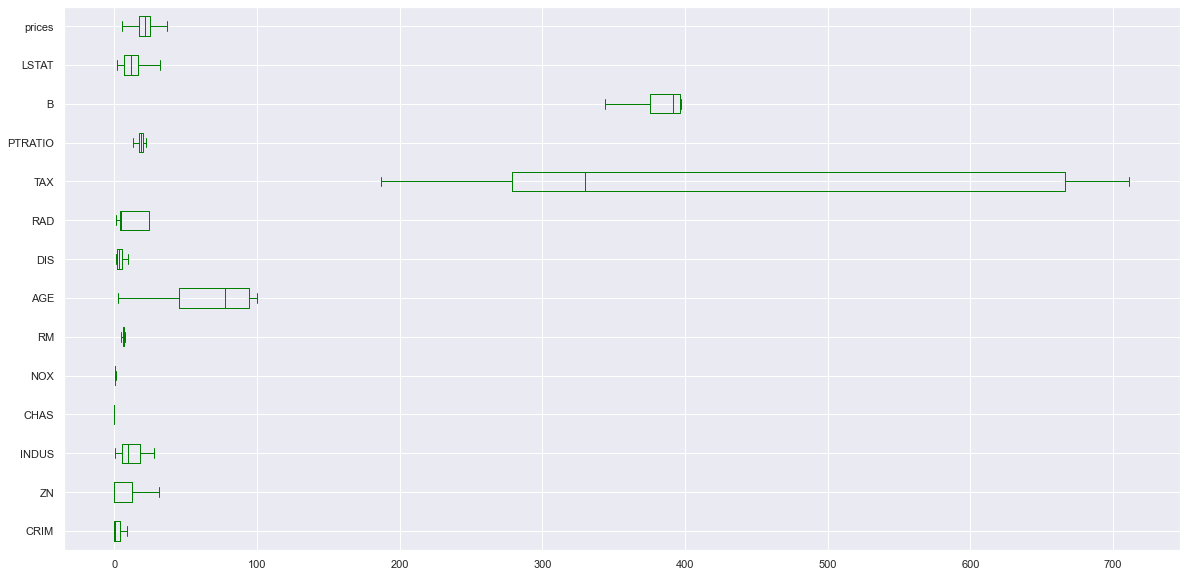

In [58]:
data.plot(kind='box',figsize=(20,10),color='Green',vert=False)
plt.show()

## prices

C:\Users\venki\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\venki\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


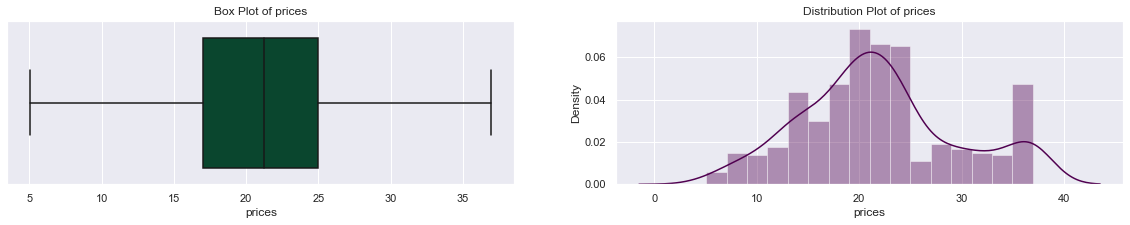

In [59]:
#Box Plot and Distribution Plot for Dependent variable MEDV
plt.figure(figsize=(20,3))

plt.subplot(1,2,1)
sns.boxplot(data.prices,color='#005030')
plt.title('Box Plot of prices')

plt.subplot(1,2,2)
sns.distplot(a=data.prices,color='#500050')
plt.title('Distribution Plot of prices')
plt.show()

**outliers removal for future work and other futurs**

# Building Machine Learning Model

In [60]:
# Arranging features based on features importance
features_arranged_on_importance = important_features.sort_values(ascending = False).index
features_arranged_on_importance

Index(['LSTAT', 'RM', 'CRIM', 'PTRATIO', 'TAX', 'NOX', 'DIS', 'INDUS', 'AGE',
       'B', 'RAD', 'ZN', 'CHAS'],
      dtype='object')

In [61]:
y = data.loc[:, 'prices'].values

In [62]:
# Existing dataframe
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,prices
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [63]:
# Arranging columns based on features importance
new_data = data[features_arranged_on_importance]
new_data.head()

,LSTAT,RM,CRIM,PTRATIO,TAX,NOX,DIS,INDUS,AGE,B,RAD,ZN,CHAS
0,4.98,6.575,0.00632,15.3,296.0,0.538,4.0900,2.31,65.2,396.90,1.0,18.0,0.0
1,9.14,6.421,0.02731,17.8,242.0,0.469,4.9671,7.07,78.9,396.90,2.0,0.0,0.0
2,4.03,7.185,0.02729,17.8,242.0,0.469,4.9671,7.07,61.1,392.83,2.0,0.0,0.0
3,2.94,6.998,0.03237,18.7,222.0,0.458,6.0622,2.18,45.8,394.63,3.0,0.0,0.0
4,5.33,7.147,0.06905,18.7,222.0,0.458,6.0622,2.18,54.2,396.90,3.0,0.0,0.0


In [64]:
# Getting boston values
X = new_data.values
X = X[:, :13]

# TODO : Splitting data as train and test data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 42)

In [65]:
X_df=pd.DataFrame(X)
X_df

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,4.98,6.575,0.00632,15.3,296.0,0.538,4.0900,2.31,65.2,396.90,1.0,18.0,0.0
1,9.14,6.421,0.02731,17.8,242.0,0.469,4.9671,7.07,78.9,396.90,2.0,0.0,0.0
2,4.03,7.185,0.02729,17.8,242.0,0.469,4.9671,7.07,61.1,392.83,2.0,0.0,0.0
3,2.94,6.998,0.03237,18.7,222.0,0.458,6.0622,2.18,45.8,394.63,3.0,0.0,0.0
4,5.33,7.147,0.06905,18.7,222.0,0.458,6.0622,2.18,54.2,396.90,3.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,9.67,6.593,0.06263,21.0,273.0,0.573,2.4786,11.93,69.1,391.99,1.0,0.0,0.0
502,9.08,6.120,0.04527,21.0,273.0,0.573,2.2875,11.93,76.7,396.90,1.0,0.0,0.0
503,5.64,6.976,0.06076,21.0,273.0,0.573,2.1675,11.93,91.0,396.90,1.0,0.0,0.0
504,6.48,6.794,0.10959,21.0,273.0,0.573,2.3889,11.93,89.3,393.45,1.0,0.0,0.0


# Multiple Linear Regression

In [66]:
from sklearn.linear_model import LinearRegression

linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

print('Training Score : ', linear_model.score(X_train, y_train))
print('Testing Score  : ', linear_model.score(X_test, y_test))

print('R2 Score : ', r2_score(y_test, linear_model.predict(X_test)))
print('MSE : ', mean_squared_error(y_test, linear_model.predict(X_test)))

Training Score :  0.7882348042556303
Testing Score  :  0.7544975790596584
R2 Score :  0.7544975790596584
MSE :  12.01119367410455


In [67]:
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline

linear_model = make_pipeline(MinMaxScaler(), LinearRegression())
linear_model.fit(X_train, y_train)

print('Training Score : ', linear_model.score(X_train, y_train))
print('Testing Score  : ', linear_model.score(X_test, y_test))

print('R2 Score : ', r2_score(y_test, linear_model.predict(X_test)))
print('MSE : ', mean_squared_error(y_test, linear_model.predict(X_test)))

Training Score :  0.7882348042556303
Testing Score  :  0.7544975790596611
R2 Score :  0.7544975790596611
MSE :  12.011193674104424


# Decision Tree Regression

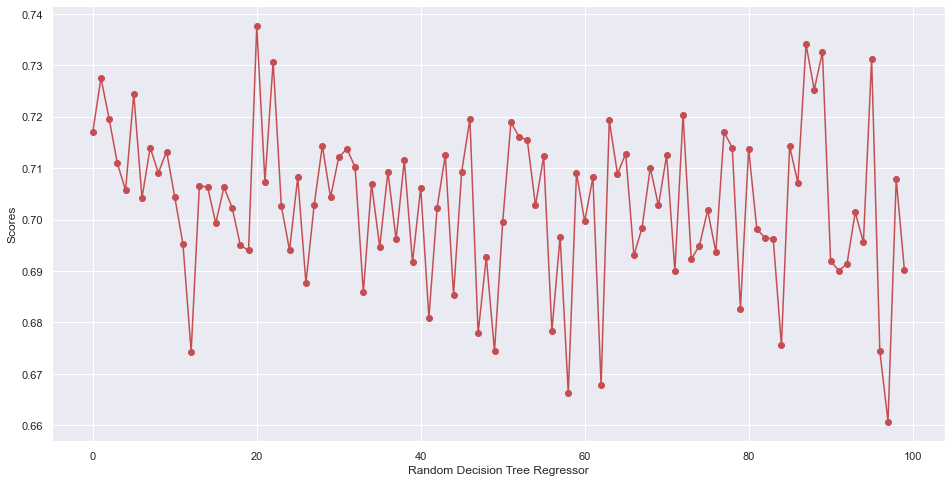

In [68]:
from sklearn.tree import DecisionTreeRegressor
scores = []
for i in range(100):

    dtr_model = DecisionTreeRegressor(max_depth=None, random_state=i)
    dtr_model.fit(X_train, y_train)
    scores.append(r2_score(y_test, dtr_model.predict(X_test)))

plt.figure(figsize = (16, 8))
plt.plot(list(range(100)), scores, 'ro-')
plt.xlabel('Random Decision Tree Regressor')
plt.ylabel('Scores')
plt.show()

**See how the decision tree score changes for different random states**

In [69]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 42)

dtr_model = DecisionTreeRegressor(max_depth=23, random_state=3)
dtr_model.fit(X_train[:, :], y_train)
    

print('Training Score : ', dtr_model.score(X_train, y_train))
print('Testing Score  : ', dtr_model.score(X_test, y_test))

print('R2 Score : ', r2_score(y_test, dtr_model.predict(X_test)))
print('MSE : ', mean_squared_error(y_test, dtr_model.predict(X_test)))

Training Score :  1.0
Testing Score  :  0.7109199996009943
R2 Score :  0.7109199996009943
MSE :  14.14322457107843


In [70]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.pipeline import make_pipeline
adtr_model = make_pipeline(MinMaxScaler(), DecisionTreeRegressor(max_depth = 12, random_state = 92))
adtr_model.fit(X_train, y_train)

print('Training Score : ', adtr_model.score(X_train, y_train))
print('Testing Score  : ', adtr_model.score(X_test, y_test))

print('R2 Score : ', r2_score(y_test, adtr_model.predict(X_test)))
print('MSE : ', mean_squared_error(y_test, adtr_model.predict(X_test)))

Training Score :  0.9964982343103498
Testing Score  :  0.7231503105659292
R2 Score :  0.7231503105659292
MSE :  13.544857218399432


# Random Forest Regression

In [71]:
from sklearn.ensemble import RandomForestRegressor
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 42)
rfr = RandomForestRegressor(max_depth = 7, random_state = 63)
rfr.fit(X_train, y_train)


print('Training Score : ', rfr.score(X_train, y_train))
print('Testing Score  : ', rfr.score(X_test, y_test))

print('R2 Score : ', r2_score(y_test, rfr.predict(X_test)))
print('MSE : ', mean_squared_error(y_test, rfr.predict(X_test)))

Training Score :  0.961906431817125
Testing Score  :  0.8680735109617554
R2 Score :  0.8680735109617554
MSE :  6.454496882407739


# Different Models Accuracy

In [72]:
X_train, X_test, y_train, y_test = train_test_split(X[:, :], y, test_size = 0.20, random_state = 42)

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor

print('Linear Regression : ')
model1 = LinearRegression()
model1.fit(X_train, y_train)
print('Score : ', model1.score(X_test, y_test))

print('Decision Tree Regression : ')
model2 = DecisionTreeRegressor(max_depth=23, random_state=3)
model2.fit(X_train, y_train)
print('Score : ', model2.score(X_test, y_test))

print('Random Forest Regression : ')
model3 = RandomForestRegressor(max_depth = 7, random_state = 63)
model3.fit(X_train, y_train)
print('Score : ', model3.score(X_test, y_test))

print('k Neighbors Regression : ')
model4 = KNeighborsRegressor(n_neighbors = 10)
model4.fit(X_train, y_train)
print('Score : ', model4.score(X_test, y_test))

Linear Regression : 
Score :  0.7544975790596584
Decision Tree Regression : 
Score :  0.7109199996009943
Random Forest Regression : 
Score :  0.8680735109617554
k Neighbors Regression : 
Score :  0.6181834503810869


# Building optimal Random Regression Model

In [73]:
X_train, X_test, y_train, y_test = train_test_split(X[:, :], y, test_size = 0.20, random_state = 46)

print('Random Forest Regression : ')
random_forest_regressor = RandomForestRegressor(max_depth = 7, random_state = 63)
random_forest_regressor.fit(X_train, y_train)
print('Score : ', random_forest_regressor.score(X, y))

Random Forest Regression : 
Score :  0.9433321741176763


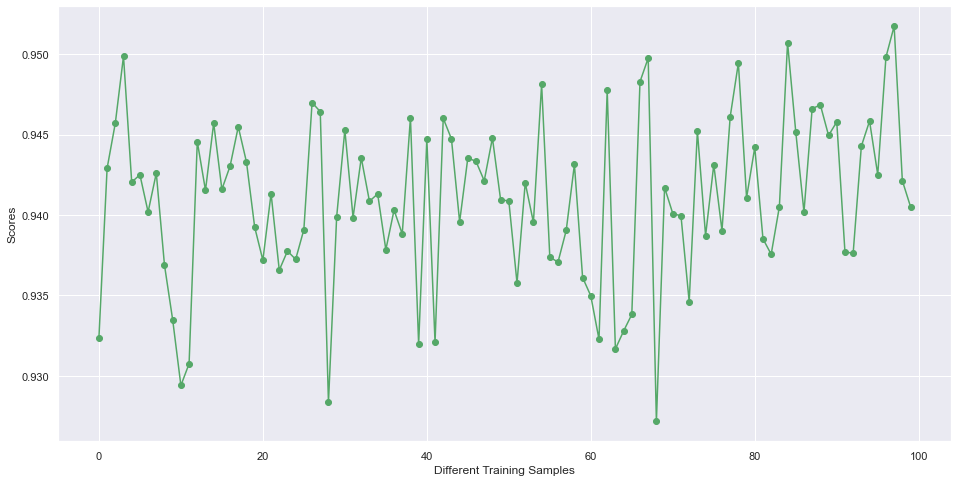

In [74]:
# Scores for different training samples
scores = []
for i in range(100):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = i)
    random_forest_regressor = RandomForestRegressor(max_depth = 7, random_state = 63)
    random_forest_regressor.fit(X_train, y_train)
    scores.append(random_forest_regressor.score(X, y))
    
plt.figure(figsize = (16, 8))
plt.plot(list(range(100)), scores, 'go-')
plt.xlabel('Different Training Samples')
plt.ylabel('Scores')
plt.show()

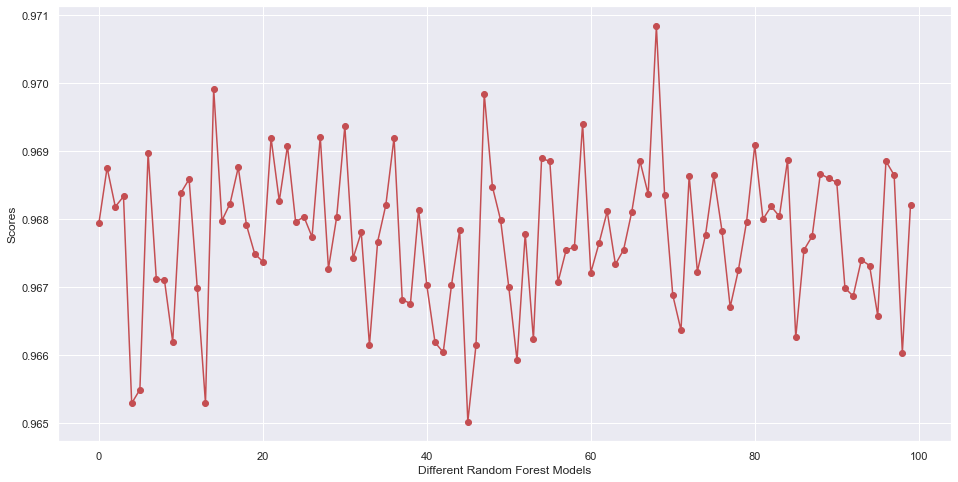

In [43]:
# Scores for different random forest model
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 3)

scores = []
for i in range(100):
    random_forest_regressor = RandomForestRegressor(max_depth = 13, random_state = i)
    random_forest_regressor.fit(X_train, y_train)
    scores.append(random_forest_regressor.score(X, y))
    
plt.figure(figsize = (16, 8))
plt.plot(list(range(100)), scores, 'ro-')
plt.xlabel('Different Random Forest Models')
plt.ylabel('Scores')
plt.show()

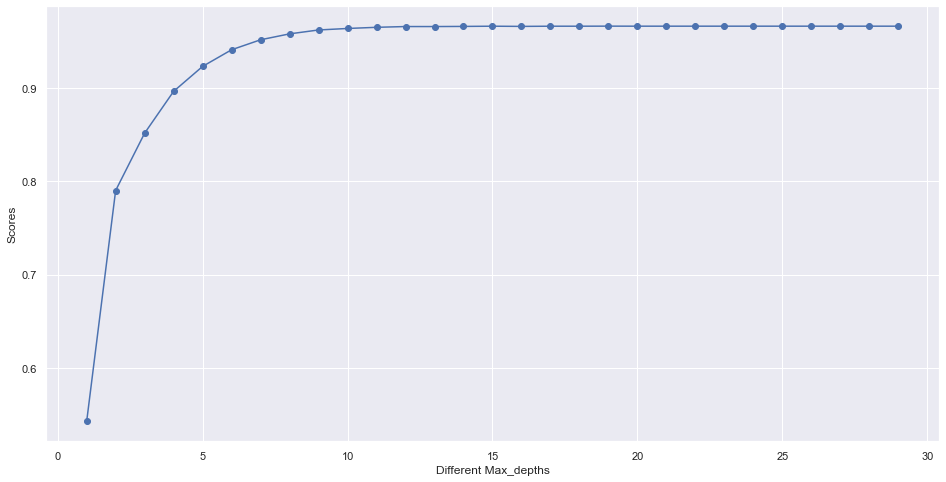

In [75]:
# Scores for different random forest model
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 3)

scores = []
for i in range(1, 30):
    random_forest_regressor = RandomForestRegressor(max_depth = i, random_state = 68)
    random_forest_regressor.fit(X_train, y_train)
    scores.append(random_forest_regressor.score(X, y))
    
plt.figure(figsize = (16, 8))
plt.plot(list(range(1, 30)), scores, 'bo-')
plt.xlabel('Different Max_depths')
plt.ylabel('Scores')
plt.show()

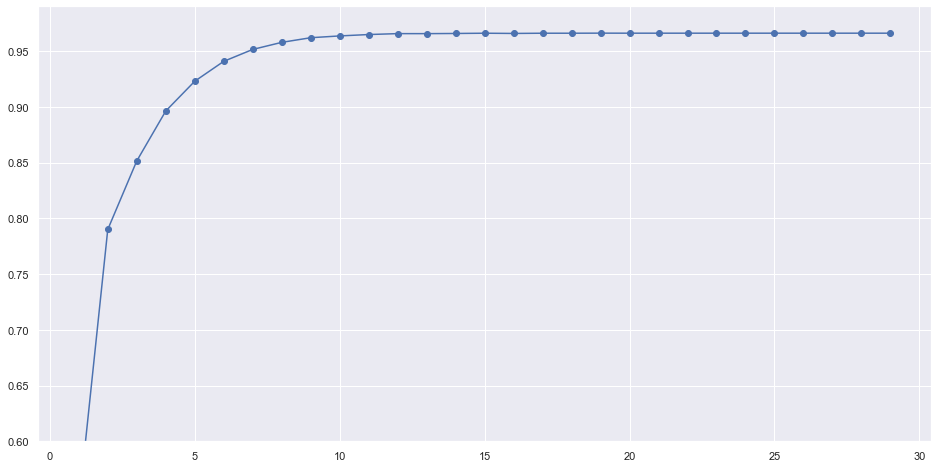

In [80]:
plt.figure(figsize = (16, 8))
plt.plot(list(range(1, 30)), scores, 'bo-')
plt.ylim(0.60, 0.99)
plt.show()

From this, we are going to choose,

random_state = 3, for choosing random Training samples  
random_state = 68, for random Random forest regressor  
max_depth = 13, for Max Depths in random forest regressor  

# Building Optimal Model

In [81]:
# Choosing Optimal Training Samples
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 3)

# Building Optimal Random Forest regressor Model
random_forest_regressor = RandomForestRegressor(max_depth = 13, random_state = 68)
random_forest_regressor.fit(X_train, y_train)

RandomForestRegressor(max_depth=13, random_state=68)

In [82]:
random_forest_regressor.score(X, y)

0.965592900548122

In [84]:
print('Training Accuracy : ', random_forest_regressor.score(X_train, y_train))
print('Testing Accuracy  : ', random_forest_regressor.score(X_test, y_test))

Training Accuracy :  0.9815910247296226
Testing Accuracy  :  0.896462946185516


In [86]:
print('Mean Squared Error : ', mean_squared_error(y_test, random_forest_regressor.predict(X_test)))
print('Root Mean Squared Error : ', mean_squared_error(y_test, random_forest_regressor.predict(X_test))**0.5)
print('Score : ', r2_score(y, random_forest_regressor.predict(X)))

Mean Squared Error :  5.570689558783301
Root Mean Squared Error :  2.3602308274368635
Score :  0.965592900548122


Finally we finishes the project. We have built a Random Forest Regressor Model which performs well with top 6 features and having the Training accuracy of 98.15% and Testing accuracy of 89.64%.

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


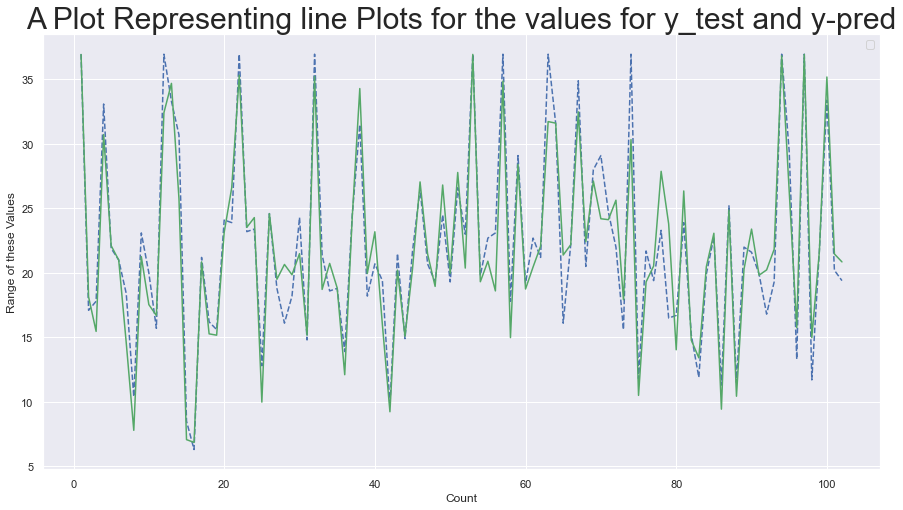

In [87]:
# plot between y-test and y_pred
y_pred = random_forest_regressor.predict(X_test)
plt.rcParams['figure.figsize'] = (15, 8)
plt.plot(np.linspace(1, 102, 102), y_test, 'b--')
plt.plot(np.linspace(1, 102, 102), y_pred, 'g-')
plt.title('A Plot Representing line Plots for the values for y_test and y-pred', fontsize = 30)
plt.xlabel('Count')
plt.ylabel('Range of these Values')
plt.legend()
plt.show()

In [89]:
import pickle
# Save trained model to file
pickle.dump(random_forest_regressor, open("final_model.pkl", "wb"))
loaded_model = pickle.load(open("final_model.pkl", "rb"))
loaded_model.predict(X_test)
loaded_model.score(X_test,y_test)

0.896462946185516

In [90]:
CRIM = input()
ZN = input()
INDUS = input()
CHAS = input()
NOX = input()
RM = input()
AGE = input()
DIS = input()
RAD = input()
TAX = input()
PTRATIO = input()
B = input()
LSTAT = input()

1
5
56
2
58
5
2
6
6
8
9
10
11


In [91]:
data = np.array([[CRIM,ZN, INDUS, CHAS, NOX, RM, AGE, DIS, RAD, TAX,PTRATIO, B, LSTAT]])
mean = np.load('mean.npy')
std = np.load('std.npy')

In [92]:
 my_prediction = loaded_model.predict(data)[0]
print(f"Price of the house is {my_prediction} Million")

Price of the house is 31.024000000000004 Million


In [93]:
# importing the necessary libraries
import pandas as pd
import numpy as np
import pickle
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.tree import DecisionTreeRegressor

# importing the dataset
data = pd.read_csv('boston_housing_prices.csv')
data.columns = data.columns.str.strip()  # removing the extra spaces

# using the stratified shuffle so that the column 'CHAS' will be equally distributed among the train and test
split = StratifiedShuffleSplit()
for train_index,test_index in split.split(data,data['CHAS']):
    train_set = data.loc[train_index]
    test_set = data.loc[test_index]  # saving the data into train and test

train = train_set.copy()
test = test_set.copy()

train_target = train['prices']
train.drop('prices',axis = 1,inplace = True)
test_target = test['prices']
test.drop('prices',axis = 1, inplace = True)

# scaling the data
scaler = StandardScaler()
scaler.fit(train) # using fit so that we can save the mean and variance of the scaled data later
train_transformed = scaler.transform(train)

# saving the required mean and variance so that we can use it after the deployment to scale the input data
std = np.sqrt(scaler.var_)
np.save('std.npy',std)
np.save('mean.npy',scaler.mean_)

regressor = DecisionTreeRegressor()
regressor.fit(train_transformed,train_target)


DecisionTreeRegressor()

In [94]:
data = np.array([[CRIM,ZN, INDUS, CHAS, NOX, RM, AGE, DIS, RAD, TAX,PTRATIO, B, LSTAT]])
my_prediction = random_forest_regressor.predict(data)

In [95]:
my_prediction

array([31.024])

In [96]:
int(my_prediction)

31